In [ ]:
# From: https://www.youtube.com/watch?v=mrGP3jWC7P4&ab_channel=SensioCoders

In [ ]:
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [61]:
import torch
import numpy as np
from sklearn.datasets import fetch_openml
import os
import matplotlib.pyplot as plt
import random
import onnx

torch.__version__

'2.0.0+cu118'

In [3]:
torch.cuda.is_available()

True

In [4]:
# ---- First steps ----

x1 = torch.zeros(2, 2)
x2 = torch.randn(3)
x3 = torch.tensor([[1, 2, 3], [4, 5, 6]])

display(x1)
display(x2)
display(x3)

tensor([[0., 0.],
        [0., 0.]])

tensor([ 0.8239, -0.0770,  0.3359])

tensor([[1, 2, 3],
        [4, 5, 6]])

In [5]:
a = np.array([[1, 2], [3, 4], [5, 6]])
x = torch.from_numpy(a)
x

tensor([[1, 2],
        [3, 4],
        [5, 6]], dtype=torch.int32)

In [6]:
# -- Operations --

x = torch.randn(3, 3)
y = torch.randn(3, 3)

display("x", x, "y", y)
display("add:", x + y)
display("prod:", x * y)


'x'

tensor([[ 1.4853, -0.6568, -0.2520],
        [ 0.2839,  0.5839,  1.4615],
        [-0.1671, -0.9089, -0.0952]])

'y'

tensor([[ 1.8229,  1.2652, -1.0203],
        [ 0.5136,  1.5570,  0.2213],
        [-0.2333, -0.0881, -0.2293]])

'add:'

tensor([[ 3.3082,  0.6085, -1.2724],
        [ 0.7975,  2.1409,  1.6829],
        [-0.4004, -0.9970, -0.3244]])

'prod:'

tensor([[ 2.7076, -0.8310,  0.2572],
        [ 0.1458,  0.9091,  0.3235],
        [ 0.0390,  0.0801,  0.0218]])

In [7]:
# -- Indexing --

display(x)
display(x[0])
display(x[0, 0])
display(x[:1, 1:])

tensor([[ 1.4853, -0.6568, -0.2520],
        [ 0.2839,  0.5839,  1.4615],
        [-0.1671, -0.9089, -0.0952]])

tensor([ 1.4853, -0.6568, -0.2520])

tensor(1.4853)

tensor([[-0.6568, -0.2520]])

In [13]:
# ---- Autograd ----

x = torch.tensor(1., requires_grad=True)
y = torch.tensor(2., requires_grad=True)
p = x + y

z = torch.tensor(3., requires_grad=True)
g = p * z

In [14]:
g.backward()

print(z.grad)  # x + y
print(x.grad)  # z
print(y.grad)  # z

tensor(3.)
tensor(3.)
tensor(3.)


In [15]:
# ---- GPU ----

x = torch.randn(3, 3, device="cuda")
y = torch.randn(3, 3, device="cuda")

x * y

tensor([[ 0.6458,  0.9182, -0.1625],
        [-2.0861, -0.5412, -0.4262],
        [-0.8330, -0.1598,  0.3427]], device='cuda:0')

In [18]:
# in cpu

x = torch.randn(10000, 10000)
y = torch.randn(10000, 10000)

%time z = x * y

CPU times: total: 172 ms
Wall time: 34 ms


In [19]:
# in gpu

x = torch.randn(10000, 10000).cuda()
y = torch.randn(10000, 10000).cuda()

%time z = x * y

CPU times: total: 0 ns
Wall time: 11 ms


In [21]:
# ---- Neural Networks ----

# Sequential models

# MLP

D_i, H, D_out = 784, 100, 10

model = torch.nn.Sequential(
    torch.nn.Linear(D_i, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

model

Sequential(
  (0): Linear(in_features=784, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=10, bias=True)
)

In [22]:
outputs = model(torch.randn(64, 784))
outputs.shape

torch.Size([64, 10])

In [23]:
# gpu
model.cuda()
x = torch.randn(64, 784).cuda()

outputs = model(x)
outputs.shape, outputs.device

(torch.Size([64, 10]), device(type='cuda', index=0))

In [24]:
# ---- Custom models ----

class Model(torch.nn.Module):

    # Constructor
    def __init__(self, D_i=784, H=100, D_out=10):

        # Super constructor
        super(Model, self).__init__()

        # Layers
        self.fc1 = torch.nn.Linear(D_i, H)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(H, D_out)

    # Forward pass
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [25]:
model = Model(784, 100, 10)
outputs = model(torch.randn(64, 784))
outputs.shape

torch.Size([64, 10])

In [ ]:
# ---- Compiling models ---- (new in Pytorch 2.0)

model_compiled = torch.compile(model)


In [47]:
# ---- Dataset ----

# if not os.path.exists("data"):
#     os.mkdir("data")
# mnist = fetch_openml("mnist_784", version=1)
# X, y = mnist["data"].values.astype(float).reshape(-1, 28, 28) / 255., mnist["target"].values.astype(int)
# np.savez_compressed("data/mnist.npz", X=X, y=y)

X, Y = np.load("data/mnist.npz").values()

X.shape, Y.shape

((70000, 28, 28), (70000,))

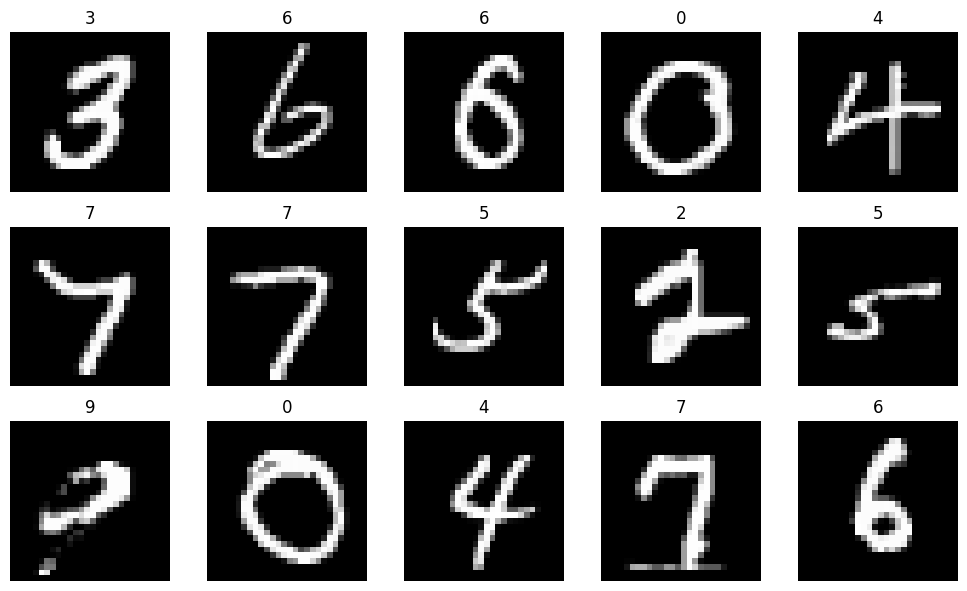

In [48]:
r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(X)-1)
        plt.imshow(X[ix], cmap="gray")
        plt.axis("off")
        plt.title(Y[ix])
plt.tight_layout()
plt.show()

In [49]:
# ---- Dataloader ----

dataloader = torch.utils.data.DataLoader(X, batch_size=100)

for batch in dataloader:
    print(batch.shape)
    break

torch.Size([100, 28, 28])


In [50]:
dataloader = torch.utils.data.DataLoader(X,                 # data
                                         batch_size=100,    # number of samples per batch
                                         shuffle=True,      # randomize the order of the samples at each epoch
                                         num_workers=4,     # number of subprocesses to use for data loading
                                         pin_memory=True,   # whether to copy tensors into CUDA pinned memory (faster training)
                                         collate_fn=None    # function to merge data samples of each batch
                                         )

In [51]:
# ---- Dataset ----

class Dataset(torch.utils.data.Dataset):

    # Constructor
    def __init__(self, X, Y):
        self.X = torch.tensor(X).float()
        self.Y = torch.tensor(Y).long()

    # Number of samples in the dataset
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, ix):
        return self.X[ix], self.Y[ix]
    
    # optional func to genereate every batch
    def collate_fn(self, batch):
        x, y = [], []
        for _x, _y in batch:
            x.append(_x)
            y.append(_y)
        return torch.stack(x).view(len(batch), -1), torch.stack(y)  # images are flattened in a single vector    

In [52]:
dataset = Dataset(X, Y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=100)

for batch in dataloader:
    x, y = batch
    print(x.shape, y.shape)
    break

torch.Size([100, 28, 28]) torch.Size([100])


In [53]:
# ---- Taining ----

dataset = Dataset(X, Y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=100, collate_fn=dataset.collate_fn)

model = Model(784, 100, 10)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

epochs = 5
for e in range(1, epochs+1):
    print(f"Epoch {e}/{epochs}")
    for batch_ix, (x, y) in enumerate(dataloader):
        optimizer.zero_grad()           # reset gradients
        outputs = model(x)              # forward pass
        loss = criterion(outputs, y)    # compute loss
        loss.backward()                 # backward pass
        optimizer.step()                # update weights
        if batch_ix % 100 == 0:
            loss, current = loss.item(), (batch_ix + 1) * len(x)
            print(f"loss: {loss:.4f} [{current:>5d}/{len(dataset):>5d}]")

Epoch 1/5
loss: 2.3061 [  100/70000]
loss: 0.4542 [10100/70000]
loss: 0.4842 [20100/70000]
loss: 0.3338 [30100/70000]
loss: 0.2484 [40100/70000]
loss: 0.2691 [50100/70000]
loss: 0.1354 [60100/70000]
Epoch 2/5
loss: 0.1637 [  100/70000]
loss: 0.2016 [10100/70000]
loss: 0.2464 [20100/70000]
loss: 0.2114 [30100/70000]
loss: 0.1432 [40100/70000]
loss: 0.1523 [50100/70000]
loss: 0.0780 [60100/70000]
Epoch 3/5
loss: 0.1110 [  100/70000]
loss: 0.1312 [10100/70000]
loss: 0.1760 [20100/70000]
loss: 0.1821 [30100/70000]
loss: 0.1071 [40100/70000]
loss: 0.0968 [50100/70000]
loss: 0.0509 [60100/70000]
Epoch 4/5
loss: 0.0897 [  100/70000]
loss: 0.0980 [10100/70000]
loss: 0.1342 [20100/70000]
loss: 0.1577 [30100/70000]
loss: 0.0825 [40100/70000]
loss: 0.0723 [50100/70000]
loss: 0.0306 [60100/70000]
Epoch 5/5
loss: 0.0710 [  100/70000]
loss: 0.0818 [10100/70000]
loss: 0.1105 [20100/70000]
loss: 0.1288 [30100/70000]
loss: 0.0648 [40100/70000]
loss: 0.0570 [50100/70000]
loss: 0.0200 [60100/70000]


In [54]:
# ---- Exporting models ----

torch.save(model, "model.pth")

In [55]:
loaded = torch.load("model.pth")
loaded

Model(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

In [56]:
# Using state dict

torch.save(model.state_dict(), "model.ckpt")

model = Model(784, 100, 10)
model.load_state_dict(torch.load("model.ckpt"))
model

Model(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

In [57]:
# Decoupling model definition from model state

model_scripted = torch.jit.script(model)
model_scripted.save("model_scripted.pt")

In [58]:
model = torch.jit.load("model_scripted.pt")
model

RecursiveScriptModule(
  original_name=Model
  (fc1): RecursiveScriptModule(original_name=Linear)
  (relu): RecursiveScriptModule(original_name=ReLU)
  (fc2): RecursiveScriptModule(original_name=Linear)
)

In [62]:
# Using onxx for framework interoperability

torch.onnx.export(
    model.cpu(),
    torch.randn(10, 784),   # dummy input
    "model.onnx",
    opset_version=11,       
    input_names=["input"],
    output_names=["output"],
    dynamic_axes={"input": {0: "batch_size"}, "output": {0: "batch_size"}},     # this allows to use different batch sizes than 10
)

============= Diagnostic Run torch.onnx.export version 2.0.0+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



c:\Code\Learning\pytorch\sensio_pytorch2\venv\Lib\site-packages\torch\onnx\utils.py:825: UserWarning: no signature found for <torch.ScriptMethod object at 0x00000249C401D2B0>, skipping _decide_input_format
  warnings.warn(f"{e}, skipping _decide_input_format")


In [63]:
onnx_model = onnx.load("model.onnx")
onnx.checker.check_model(onnx_model)

In [64]:
import onnxruntime as ort

ort_session = ort.InferenceSession("model.onnx")
ort_inputs = {ort_session.get_inputs()[0].name: torch.randn(10, 784).numpy()}
ort_outs = ort_session.run(None, ort_inputs)
ort_outs[0].shape

ModuleNotFoundError: No module named 'onnxruntime'